In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
fminst = tf.keras.datasets.fashion_mnist

In [ ]:
tf.keras.datasets.fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
print(tf.keras.datasets.fashion_mnist)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>


In [ ]:
(train_images, train_labels), (test_images, test_labels) =fminst.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
index = 42 #(can choose between 0, 59999)
#set number of characters per row when printing
np.set_printoptions(linewidth= 320)
#print the label and image
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n{train_images[index]}')

LABEL: 9

IMAGE PIXEL ARRAY:
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0. 

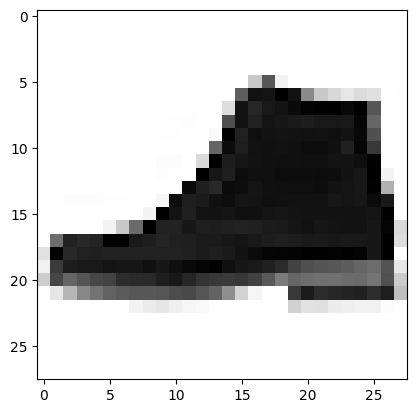

In [ ]:
plt.imshow(train_images[index],cmap="Greys")

In [ ]:
#normalizing the data
train_images = train_images/255.0
test_images = test_images/255.0


In [ ]:
# three layers #input layer - in shape of data , output layer -with shape of the  classes and the hidden layer is try to find the relat5ion between them
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [ ]:
#Declare sample inputs and convert to a tensor
inputs = np.array([[1.0,3.0,4.0,2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function:{inputs.numpy()}')

input to softmax function:[[1. 3. 4. 2.]]


In [ ]:
# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
               metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4982 - accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3764 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3383 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3138 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2952 - accuracy: 0.8904


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8760


[0.341237872838974, 0.8759999871253967]

In [ ]:
import tensorflow as tf

# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
#callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model with a callback
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4748 - accuracy: 0.8301
Epoch 2/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.3580 - accuracy: 0.8691
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3581 - accuracy: 0.8690
